# Template Matching
In this notebook, you will learn
- To find objects in an image using Template Matching
- You will see these functions: `cv2.matchTemplate()`, `cv2.minMaxLoc()`

In [1]:
# For python2/3 compatibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
from timeit import default_timer as timer

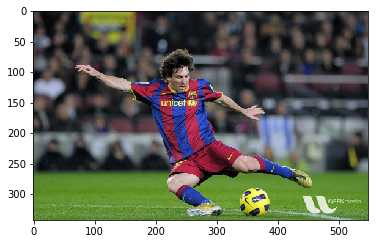

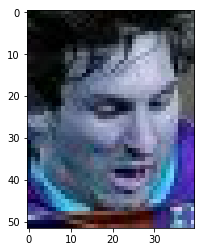

In [3]:
img = cv2.imread('../images/messi.jpg')
img2 = img.copy()
template = cv2.imread('../images/messi_face.jpg')
w, h, _ = template.shape

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(template)

In [4]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

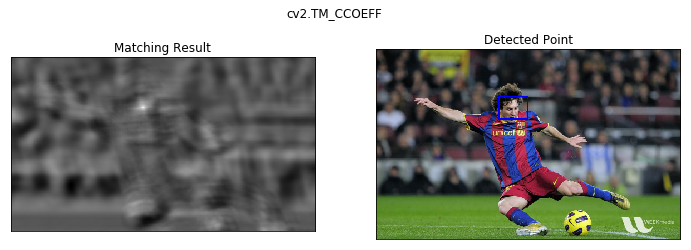

0.0473780632019 seconds


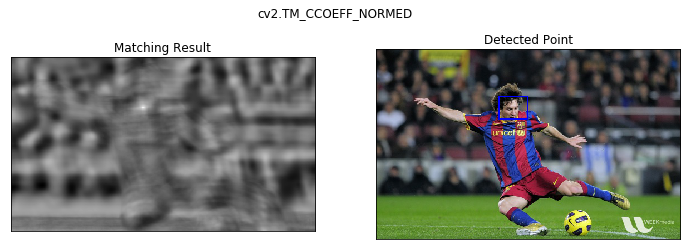

0.0349671840668 seconds


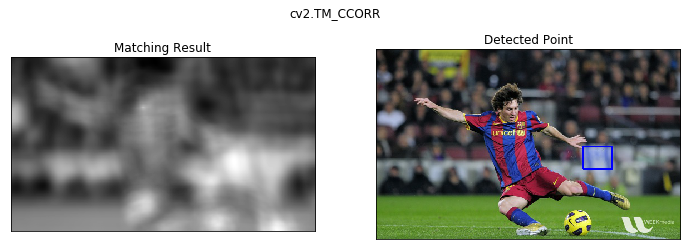

0.0289690494537 seconds


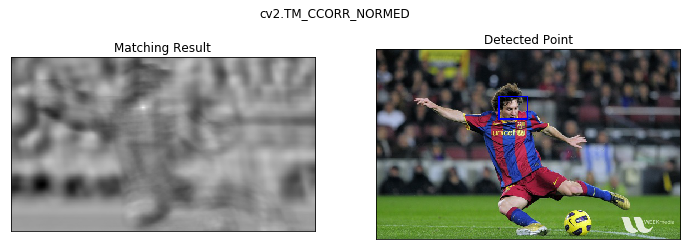

0.0340929031372 seconds


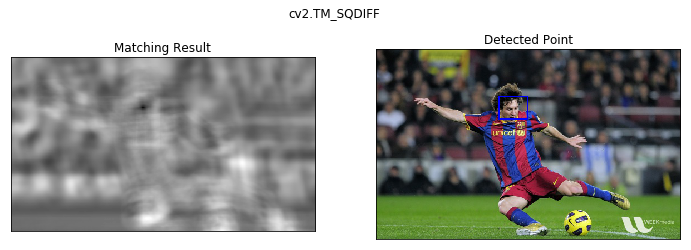

0.0356709957123 seconds


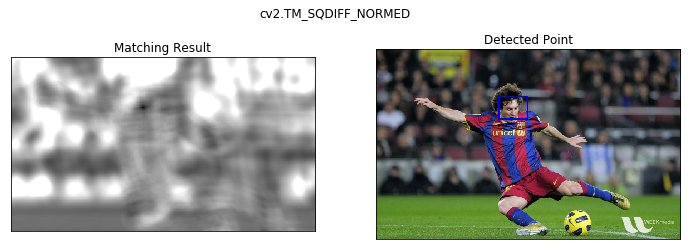

0.0339550971985 seconds


In [5]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    start = timer()
    
    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    end = timer()
    
    # Draw matching point
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.figure(figsize=(12,4))
    
    # Draw matching result
    plt.subplot(1,2,1)
    plt.imshow(res, cmap = 'gray')
    plt.title('Matching Result')
    plt.xticks([])
    plt.yticks([])
    
    # Draw detected point
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point')
    plt.xticks([])
    plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    
    print(str(end - start) + " seconds")

## Practice1: Template Matching with Multiple Objects

Suppose you are searching for an object has multiple occurances, `cv2.minMaxLoc()` won't give you all the locations.
In that case, we will use thresholding. For example,

```python
res = cv2.matchTemplate(img, template, method)
threadhold = 0.8
loc = np.where(res >= threshold)
```

Now, write code for template matching with multiple objects.

Result:
<img src="../images/res_mario.jpg" width="400">

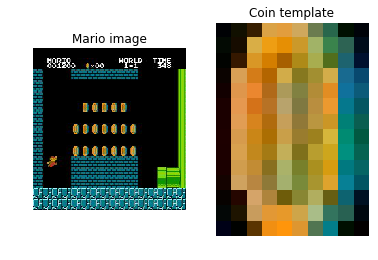

In [6]:
mario_img = cv2.imread('../images/res_mario.jpg')[:, :225, :]
coin = mario_img[82:96, 72:82, :]

plt.subplot(1, 2, 1); plt.title("Mario image"); plt.axis('off')
plt.imshow(cv2.cvtColor(mario_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2); plt.title("Coin template"); plt.axis('off')
plt.imshow(cv2.cvtColor(coin, cv2.COLOR_BGR2RGB))

# Your code here

## Practice2: Fast Template Matching
1. Reduce resolution of both template and image by creating an *image pyramid*
2. Match small template against small image
3. Identify locations of strong matches
4. Expand the image and template, and match higher resolution template selectively to higher resolution image
5. Iterate on higher and higher resolution images

Now, write fast template matching code for messi images

In [7]:
# Your code here

---

### Reference

Please see the following official tutorials for more detailed explanation.

- [Template Matching - OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html#py-template-matching)